# Pricing Model of the Seattle Airbnb Dataset
## Business User: A leaser or prospective leaser


## Business Questions


## Data Source
https://www.kaggle.com/c/home-credit-default-risk

In [30]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error,classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#set datafram display 
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

In [3]:
#import datasets
df_app=pd.read_csv("application_train.csv")


In [4]:
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.07e+05,24700.5,3.51e+05,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.88e-02,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00e+00,0.00e+00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.0,0.0,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00e+00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1.29e+06,35698.5,1.13e+06,Family,State servant,Higher education,Married,House / apartment,3.54e-03,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,3.90e-03,9.80e-03,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.0,0.0,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,3.90e-03,0.01,reg oper account,block of flats,0.07,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.35e+05,6750.0,1.35e+05,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.00e-02,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100

In [5]:
df_app["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
#Pricing column has Nan values
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
for col in df_app.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [8]:
def cols_with_few(df,threshold):
    '''
    Input: Dataframe, a threshold of unique values
    Output: Prints of fields and the unique values they contain
    Global variables: few, a list of fields
    '''

    for col in df.columns:
        a=df[col].unique().shape[0]
        if a<threshold:
            a=df[col].value_counts()
            print("")
            print("##############")
            print(col)
            print(a)

In [9]:
cols_with_few(df_app,4)


##############
TARGET
0    282686
1     24825
Name: TARGET, dtype: int64

##############
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

##############
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##############
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

##############
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

##############
FLAG_MOBIL
1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

##############
FLAG_EMP_PHONE
1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

##############
FLAG_WORK_PHONE
0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

##############
FLAG_CONT_MOBILE
1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

##############
FLAG_PHONE
0    221080
1     86431
Name: FLAG_PHONE, dtype: int64

##############
FLAG_EMAIL
0    290069
1     17442
Name: FLAG_EMAIL, dtype: int6

## Observations
#### SK_ID_CURR
 - Key

#### TARGET
 - Binary as int
 - target column
 - No Nan values
 
#### NAME_CONTRACT_TYPE
 - Categorical as int64
 
#### CODE_GENDER
 - genders
 - mainly male / female
 - 4 exmamples of other
 - potentially exclude rows with "XNA" 

#### FLAG_OWN_CAR
 - y/n to be converted to binary
 - No Nan values
 
#### FLAG_OWN_REALTY
 - y/n to be converted to binary
 - No Nan values
 
#### CNT_CHILDREN
 - okay type
 
#### AMT_INCOME_TOTAL
 - okay type
 - check for outliers
 - ****need to investigate further
 
#### AMT_CREDIT
 - okay type
 - check for outliers
 - ****need to investigate further

#### AMT_ANNUITY
 - okay type
 - check for outliers
 - ****need to investigate further
 
#### AMT_GOODS_PRICE
 - okay type
 - check for outliers
 - ****need to investigate further
 
#### NAME_TYPE_SUITE
 - Categorical as int64
 
#### NAME_INCOME_TYPE
 - Categorical as int64
 
#### NAME_EDUCATION_TYPE
 - Categorical as int64
 
#### NAME_FAMILY_STATUS
 - Categorical as int64
 
#### NAME_HOUSING_TYPE
 - Categorical as int64
 
#### REGION_POPULATION_RELATIVE
 - ****need to investigate further
 
#### DAYS_BIRTH
 - ****need to investigate further

#### DAYS_EMPLOYED
 - ****need to investigate further
 
#### DAYS_REGISTRATION
 - ****need to investigate further
 
#### DAYS_ID_PUBLISH
 - ****need to investigate further
 
#### OWN_CAR_AGE
 - appears to be the age of the person's car
 
#### FLAG_MOBIL
 - binary as int
 - drop column
 - 2 values, but only 1 divergent observation
 
 
#### FLAG_EMP_PHONE
 - binary as int
 
#### FLAG_WORK_PHONE
 - binary as int
 
#### FLAG_CONT_MOBILE
 - binary as int
 
#### FLAG_PHONE
 - binary as int
 
#### FLAG_EMAIL
 - binary as int
 
#### OCCUPATION_TYPE
 - categorical
 
#### CNT_FAM_MEMBERS
 - floats
 
#### REGION_RATING_CLIENT
 - floats

#### REGION_RATING_CLIENT_W_CITY
 - floats

#### WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START
 - concat the two fields to a categorical
 
#### REG_REGION_NOT_LIVE_REGION
 - Binary as int
 
#### REG_REGION_NOT_WORK_REGION
 - Binary as int
 
#### LIVE_REGION_NOT_WORK_REGION
 - Binary as int
 
#### REG_CITY_NOT_LIVE_CITY
 - Binary as int
 
#### REG_CITY_NOT_WORK_CITY
 - Binary as int
 
#### LIVE_CITY_NOT_WORK_CITY
 - Binary as int
 
#### ORGANIZATION_TYPE
 - Categorical
 
#### EXT_SOURCE_1
 - floats

#### EXT_SOURCE_2
 - floats

#### EXT_SOURCE_3
 - floats

#### APARTMENTS_AVG
 - floats

#### BASEMENTAREA_AVG
 - floats

#### YEARS_BEGINEXPLUATATION_AVG
 - floats

#### YEARS_BUILD_AVG
 - floats

#### COMMONAREA_AVG
 - floats

#### ELEVATORS_AVG
 - floats

#### ENTRANCES_AVG
 - floats

#### FLOORSMAX_AVG
 - floats

#### FLOORSMIN_AVG
 - floats

#### LANDAREA_AVG
 - floats

#### LIVINGAPARTMENTS_AVG
 - floats

#### LIVINGAREA_AVG
 - floats

#### NONLIVINGAPARTMENTS_AVG
 - floats

#### NONLIVINGAREA_AVG
 - floats

#### APARTMENTS_MODE
 - floats

#### BASEMENTAREA_MODE
 - floats

#### YEARS_BEGINEXPLUATATION_MODE
 - floats

#### YEARS_BUILD_MODE
 - floats

#### COMMONAREA_MODE
 - floats

#### ELEVATORS_MODE
 - floats

#### ENTRANCES_MODE
 - floats

#### FLOORSMAX_MODE
 - floats

#### FLOORSMIN_MODE
 - floats

#### LANDAREA_MODE
 - floats

#### LIVINGAPARTMENTS_MODE
 - floats

#### LIVINGAREA_MODE
 - floats

#### NONLIVINGAPARTMENTS_MODE
 - floats

#### NONLIVINGAREA_MODE
 - floats

#### APARTMENTS_MEDI
 - floats

#### BASEMENTAREA_MEDI
 - floats

#### YEARS_BEGINEXPLUATATION_MEDI
 - floats

#### YEARS_BUILD_MEDI
 - floats

#### COMMONAREA_MEDI
 - floats

#### ELEVATORS_MEDI
 - floats

#### ENTRANCES_MEDI
 - floats

#### FLOORSMAX_MEDI
 - floats

#### FLOORSMIN_MEDI
 - floats

#### LANDAREA_MEDI
 - floats

#### LIVINGAPARTMENTS_MEDI
 - floats

#### LIVINGAREA_MEDI
 - floats

#### NONLIVINGAPARTMENTS_MEDI
 - floats

#### NONLIVINGAREA_MEDI
 - floats
 
#### FONDKAPREMONT_MODE
 - Categorical
 
#### HOUSETYPE_MODE
 - Categorical
 
#### TOTALAREA_MODE
 - floats

#### WALLSMATERIAL_MODE
 - floats

#### EMERGENCYSTATE_MODE
 - floats

#### OBS_30_CNT_SOCIAL_CIRCLE
 - floats

#### DEF_30_CNT_SOCIAL_CIRCLE
 - floats

#### OBS_60_CNT_SOCIAL_CIRCLE
 - floats

#### DEF_60_CNT_SOCIAL_CIRCLE
 - floats

#### DAYS_LAST_PHONE_CHANGE
 - floats

#### FLAG_DOCUMENT_2
 - binary as int
 - 2 values, 1x 13, 0x 218340 - Drop column
 
#### FLAG_DOCUMENT_3
 - binary as int
 
#### FLAG_DOCUMENT_4
 - binary as int
 - 2 values, 1x 25, 0x 307486 - Drop column
 
#### FLAG_DOCUMENT_5
 - binary as int
 
#### FLAG_DOCUMENT_6
 - binary as int
 
#### FLAG_DOCUMENT_7
 - binary as int
 
#### FLAG_DOCUMENT_8
 - binary as int
 
#### FLAG_DOCUMENT_9
 - binary as int
 
#### FLAG_DOCUMENT_10
 - binary as int
 
#### FLAG_DOCUMENT_11
 - binary as int
 
#### FLAG_DOCUMENT_12
 - binary as int
 
#### FLAG_DOCUMENT_13
 - binary as int
 
#### FLAG_DOCUMENT_14
 - binary as int
 
#### FLAG_DOCUMENT_15
 - binary as int
 
#### FLAG_DOCUMENT_16
 - binary as int
 
#### FLAG_DOCUMENT_17
 - binary as int
 
#### FLAG_DOCUMENT_18
 - binary as int
 
#### FLAG_DOCUMENT_19
 - binary as int
 
#### FLAG_DOCUMENT_20
 - binary as int
 
#### FLAG_DOCUMENT_21
 - binary as int
 
#### AMT_REQ_CREDIT_BUREAU_HOUR
 - floats
 
#### AMT_REQ_CREDIT_BUREAU_DAY
 - floats
 
#### AMT_REQ_CREDIT_BUREAU_WEEK
 - floats
 
#### AMT_REQ_CREDIT_BUREAU_MON
 - floats
 
#### AMT_REQ_CREDIT_BUREAU_QRT
 - floats
 
#### AMT_REQ_CREDIT_BUREAU_YEAR
 - floats
 

FLAG_MOBIL - 2 values, 1x 307510, 0x 1 - Drop column
FLAG_DOCUMENT_2 - 2 values, 1x 13, 0x 218340 - Drop column
FLAG_DOCUMENT_4 - 2 values, 1x 25, 0x 307486 - Drop column
FLAG_DOCUMENT_7 - 

In [10]:
cols_drop=["FLAG_MOBIL","FLAG_DOCUMENT_2","FLAG_DOCUMENT_4"]

In [11]:
def cat_onehot(df,method="median"):
    
    '''
    Input: Dataframe, imputation method (median or mode)
    Output: a dataframe where objects are converted to binary columns with dummie_na and remaining values are imputed with the selected method
    '''
    global cat_df
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns

    df_cat=df.copy()

    for col in  cat_cols:
        df_cat = pd.concat([df_cat.drop(col, axis=1), pd.get_dummies(df_cat[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True).astype(np.int8)], axis=1)

    if method=="median":
        # median function
        fill_med = lambda col: col.fillna(col.median())
        # Fill the median
        df_cat = df_cat.apply(fill_med, axis=0)

    if method=="mode":
        # mode function
        fill_mode = lambda col: col.fillna(col.mode()[0])
        # Fill the median
        df_cat = df_cat.apply(fill_mode, axis=0)

    return df_cat

df_app=cat_onehot(df_app,method="mode")

In [12]:
df_app.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity 

In [16]:
#Log_reg=LogisticRegression(max_iter=300)
Log_reg=LogisticRegression(max_iter=100)

In [17]:
drops=["TARGET","SK_ID_CURR"]
X = df_app.drop(drops,axis=1)
y = df_app["TARGET"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [18]:
#Log_reg.fit(X_train,np.ravel(y_train))
Log_reg.fit(X_train,y_train)

C:\Users\keaga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
Log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
Log_reg.intercept_

array([-2.75838259e-08])

In [21]:
Log_reg.coef_

array([[-3.09754701e-08, -1.77578893e-06,  3.06431387e-06,
         6.92629041e-06, -3.93940625e-06, -9.58442913e-10,
         1.10357323e-04,  8.66793501e-07,  2.00545750e-05,
         8.79954390e-05, -2.17389331e-07, -2.75789663e-08,
        -2.72108179e-08,  3.43890073e-09, -2.74299790e-08,
        -1.30841995e-08, -3.84651010e-09, -8.27209510e-08,
        -2.69208416e-08, -2.51758145e-08, -4.37415907e-07,
        -9.10168947e-11,  4.43196648e-10,  3.74357130e-10,
         4.99221333e-09,  6.21709579e-09,  4.18099681e-09,
        -2.45513917e-08, -5.00536362e-08, -4.85296519e-08,
        -4.83285998e-09, -3.23783158e-09, -2.73647868e-08,
        -2.24678034e-08, -1.41634239e-09, -4.33044928e-09,
        -5.05973424e-09, -9.54897119e-09, -7.88090691e-09,
        -2.05847144e-09, -3.16235064e-09, -5.02516678e-09,
        -2.15767307e-10, -1.28699317e-09, -4.64906459e-09,
        -3.14186282e-09, -2.73450106e-08, -2.26425422e-08,
        -1.32041482e-09, -4.05577709e-09, -4.88290092e-0

In [22]:
preds=Log_reg.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

In [23]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])



In [24]:
preds_df.head()

,prob_default
0,0.11
1,0.05
2,0.06
3,0.04
4,0.08


In [53]:
# Reassign loan status based on the threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.075 else 0)

# Print the row counts for each loan status
print(preds_df["loan_status"].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))
default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]

0    47702
1    44552
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.94      0.53      0.68     84841
     Default       0.11      0.64      0.18      7413

    accuracy                           0.54     92254
   macro avg       0.52      0.58      0.43     92254
weighted avg       0.88      0.54      0.64     92254



In [26]:
default_recall

0.38392014029407795

In [50]:
thresh=np.arange(0.0, 0.3, 0.005)

default_recall_list=[]
nondefault_recall_list=[]
accuracy_list=[]

for t in thresh:
    #print("")
    #print("#### Threshold="+str(t))
    # Reassign loan status based on the threshold
    preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > t else 0)

    # Print the row counts for each loan status
    #print(preds_df["loan_status"].value_counts())

    # Print the classification report
    #target_names = ['Non-Default', 'Default']
    #print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))
    
    #default recall
    default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]
    #print("Default recall="+str(default_recall))
    default_recall_list.append(default_recall)
    
    #non-default recall values
    nondefault_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][0]
    #print("Non Default recall="+str(nondefault_recall))
    nondefault_recall_list.append(nondefault_recall)
    
    
    #Accuracy Score
    test_accuracy=accuracy_score(y_test,preds_df["loan_status"])
    #print("Accuracy Score="+str(test_accuracy))
    
    accuracy_list.append(test_accuracy)
    


C:\Users\keaga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


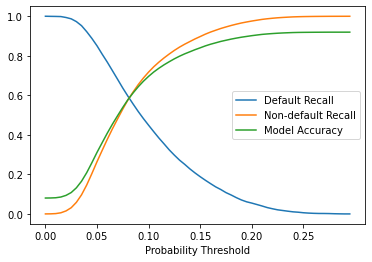

In [52]:
ticks=np.arange(0.0, 0.3, 0.05)

plt.plot(thresh,default_recall_list)
plt.plot(thresh,nondefault_recall_list)
plt.plot(thresh,accuracy_list)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)
    print('                   ', name, '\n',
    classification_report(y_test, model.predict(X_test)))


drops=["TARGET","SK_ID_CURR"]
X = df_app.drop(drops,axis=1)
y = df_app["TARGET"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#KNN
knn = KNeighborsClassifier(n_neighbors=151)
model_assess(knn, name='KNN')
#Logistic Regression
lg = LogisticRegression(random_state=0)
model_assess(lg, 'Logistic Regression')
#XGB
#xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
#model_assess(xgb, 'XGBoost')

In [ ]:
# Reassign the values of loan status based on the new threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df["loan_status"].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]

# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

In [ ]:
Log_reg.score(X_test,y_test)

classification_report(y_test,y,target_names=target_names)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [ ]:
fallout, sensitivity, thresholds=roc_curve(y_test,prob_default)
plt.plot(fallout, sensitivity,color="darkorange")

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)